In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath('../scripts'))




In [4]:
df= pd.read_csv('../data/df_cleaned.csv')

In [7]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,411762.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,411762.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,411762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,411762.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,411762.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


### identifying the top 10 handsets used by the customers.

In [12]:
if 'Handset' in df.columns:
    top_handsets = df['Handset'].value_counts().head(10)
else:
    print("Column 'handset' does not exist in the DataFrame.")

Column 'handset' does not exist in the DataFrame.


In [15]:
# Exclude "undefined" from the DataFrame
filtered_df = df[df['Handset Type'] != 'undefined']
# Count occurrences of each handset
handset_counts = filtered_df['Handset Type'].value_counts()

# Get the top 10 handsets
top_10_handsets = handset_counts.head(10)

# Display the results
print(top_10_handsets)

Handset Type
Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9395
Apple iPhone 6 (A1586)           8993
Apple iPhone 7 (A1778)           6279
Apple iPhone Se (A1723)          5165
Apple iPhone 8 (A1905)           4977
Apple iPhone Xr (A2105)          4556
Samsung Galaxy S8 (Sm-G950F)     4464
Apple iPhone X (A1901)           3806
Samsung Galaxy A5 Sm-A520F       3700
Name: count, dtype: int64


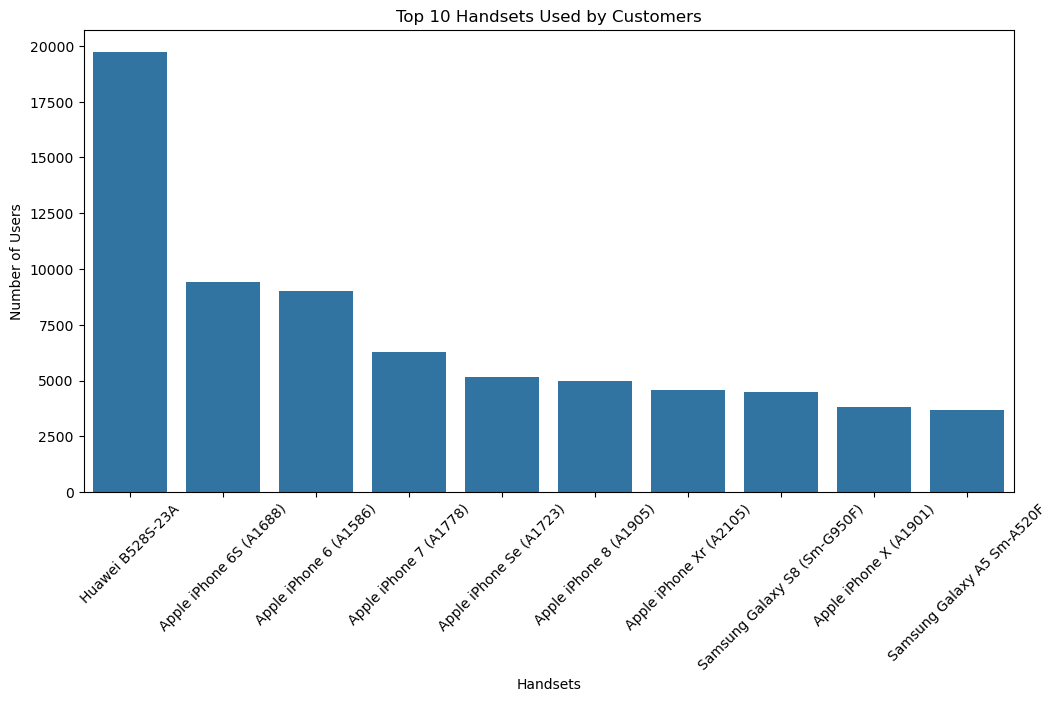

In [19]:
# Plotting the top 10 handsets
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_handsets.index, y=top_10_handsets.values)
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Handsets')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

In [21]:
if 'manufacturer' in df.columns:
    top_manufacturers = df['manufacturer'].value_counts().head(3)
else:
    print("Column 'manufacturer' does not exist in the DataFrame.")

Column 'manufacturer' does not exist in the DataFrame.


In [22]:
# Count occurrences of each handset
handset_manuf_counts = df['Handset Manufacturer'].value_counts()

# Get the top 10 handsets
top_3_manufacturer = handset_manuf_counts.head(3)

# Display the results
print(top_3_manufacturer)

Handset Manufacturer
Apple      59339
Samsung    40429
Huawei     34296
Name: count, dtype: int64


In [28]:

# Count occurrences of each handset
handset_manufacturer_counts = df['Handset Manufacturer'].value_counts()

# Get the top 10 handsets
top_manufacturer = handset_manufacturer_counts.head(3)

# Display the results
print(top_manufacturer)

Handset Manufacturer
Apple      59339
Samsung    40429
Huawei     34296
Name: count, dtype: int64


C:\Users\gtaye\AppData\Local\Temp\ipykernel_19344\1787652456.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_manufacturer.index, x=top_manufacturer.values, palette='viridis')


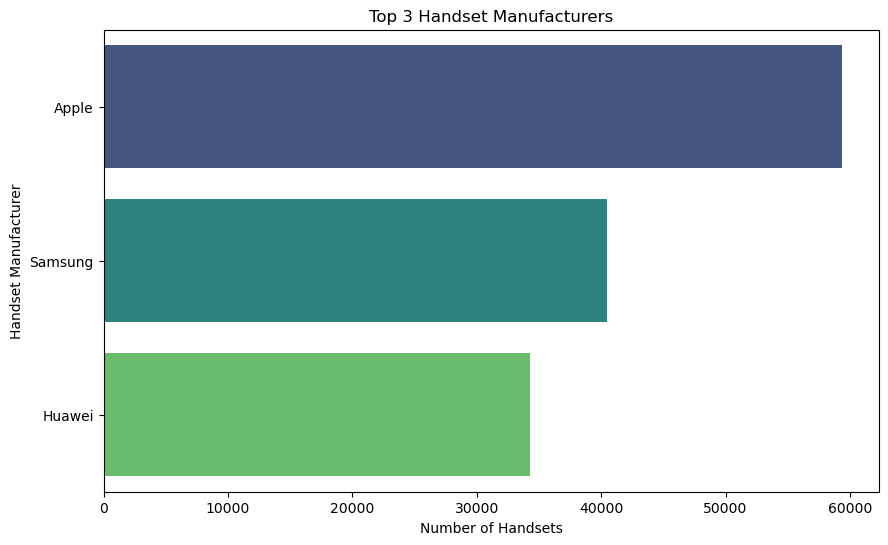

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_manufacturer.index, x=top_manufacturer.values, palette='viridis')
plt.title('Top 3 Handset Manufacturers')
plt.xlabel('Number of Handsets')
plt.ylabel('Handset Manufacturer')
plt.show()

In [30]:

# Count occurrences of each handset by manufacturer
handset_counts = df.groupby(['Handset Manufacturer', 'Handset Type']).size().reset_index(name='Count')

# Identify the top 3 manufacturers based on total handset counts
top_manufacturers = handset_counts.groupby('Handset Manufacturer')['Count'].sum().nlargest(3).index

# Filter for the top manufacturers and get the top 5 handsets per manufacturer
top_handsets_per_manufacturer = (
    handset_counts[handset_counts['Handset Manufacturer'].isin(top_manufacturers)]
    .groupby('Handset Manufacturer', as_index=False)  # Ensure grouping column is included
    .apply(lambda x: x.nlargest(5, 'Count'))
    .reset_index(drop=True)
)



# Display the results
print(top_handsets_per_manufacturer.sort_values('Handset Manufacturer'))

   Handset Manufacturer                    Handset Type  Count
0                 Apple         Apple iPhone 6S (A1688)   9395
1                 Apple          Apple iPhone 6 (A1586)   8993
2                 Apple          Apple iPhone 7 (A1778)   6279
3                 Apple         Apple iPhone Se (A1723)   5165
4                 Apple          Apple iPhone 8 (A1905)   4977
5                Huawei                Huawei B528S-23A  19727
6                Huawei                    Huawei E5180   2074
7                Huawei  Huawei P20 Lite Huawei Nova 3E   2012
8                Huawei                      Huawei P20   1475
9                Huawei                  Huawei Y6 2018    996
10              Samsung    Samsung Galaxy S8 (Sm-G950F)   4464
11              Samsung      Samsung Galaxy A5 Sm-A520F   3700
12              Samsung     Samsung Galaxy J5 (Sm-J530)   3675
13              Samsung     Samsung Galaxy J3 (Sm-J330)   3456
14              Samsung    Samsung Galaxy S7 (Sm-G930X)

C:\Users\gtaye\AppData\Local\Temp\ipykernel_19344\465381166.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'Count'))


In [32]:
# Aggregate data per user
aggregated_data = df.groupby('MSISDN/Number').agg(
    number_of_sessions=('Bearer Id', 'nunique'),
    total_session_duration_sec=('Dur. (ms)', 'sum'),
    total_download=('Total DL (Bytes)', 'sum'),
    total_upload=('Total UL (Bytes)', 'sum'),
    social_media_volume=('Social Media DL (Bytes)', 'sum'),
    google_volume=('Google DL (Bytes)', 'sum'),
    email_volume=('Email DL (Bytes)', 'sum'),
    youtube_volume=('Youtube DL (Bytes)', 'sum'),
    netflix_volume=('Netflix DL (Bytes)', 'sum'),
    gaming_volume=('Gaming DL (Bytes)', 'sum'),
    other_volume=('Other DL (Bytes)', 'sum')
).reset_index()

# Sum upload and download for each application
aggregated_data['social_media_volume'] += df.groupby('MSISDN/Number')['Social Media UL (Bytes)'].sum().values
aggregated_data['google_volume'] += df.groupby('MSISDN/Number')['Google UL (Bytes)'].sum().values
aggregated_data['email_volume'] += df.groupby('MSISDN/Number')['Email UL (Bytes)'].sum().values
aggregated_data['youtube_volume'] += df.groupby('MSISDN/Number')['Youtube UL (Bytes)'].sum().values
aggregated_data['netflix_volume'] += df.groupby('MSISDN/Number')['Netflix UL (Bytes)'].sum().values
aggregated_data['gaming_volume'] += df.groupby('MSISDN/Number')['Gaming UL (Bytes)'].sum().values
aggregated_data['other_volume'] += df.groupby('MSISDN/Number')['Other UL (Bytes)'].sum().values

# Calculate total data volume
aggregated_data['total_data_volume'] = aggregated_data['total_download'] + aggregated_data['total_upload']

# Display the aggregated data
print(aggregated_data.shape)


(106469, 13)


In [33]:
aggregated_data.head()

,MSISDN/Number,number_of_sessions,total_session_duration_sec,total_download,total_upload,social_media_volume,google_volume,email_volume,youtube_volume,netflix_volume,gaming_volume,other_volume,total_data_volume
0,3.360100e+10,1,116720.0,8.426375e+08,36053108.0,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0,8.786906e+08
1,3.360100e+10,1,181230.0,1.207552e+08,36104459.0,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0,1.568596e+08
2,3.360100e+10,1,134969.0,5.566597e+08,39306820.0,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0,5.959665e+08
3,3.360101e+10,1,49878.0,4.019932e+08,20327526.0,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0,4.223207e+08
4,3.360101e+10,2,37104.0,1.363130e+09,94280527.0,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0,1.457411e+09


In [34]:
print(aggregated_data['number_of_sessions'].unique().size)
print(aggregated_data['number_of_sessions'].unique())

17
[ 1  2  3  5  4 12  6  9  7 17  8 18 10 11 16 13 15]


In [35]:
aggregated_data.isnull().sum()

MSISDN/Number                 0
number_of_sessions            0
total_session_duration_sec    0
total_download                0
total_upload                  0
social_media_volume           0
google_volume                 0
email_volume                  0
youtube_volume                0
netflix_volume                0
gaming_volume                 0
other_volume                  0
total_data_volume             0
dtype: int64

In [36]:
aggregated_data.describe()

,MSISDN/Number,number_of_sessions,total_session_duration_sec,total_download,total_upload,social_media_volume,google_volume,email_volume,youtube_volume,netflix_volume,gaming_volume,other_volume,total_data_volume
count,1.064690e+05,106469.000000,1.064690e+05,1.064690e+05,1.064690e+05,1.064690e+05,1.064690e+05,1.064690e+05,1.064690e+05,1.064690e+05,1.064690e+05,1.064690e+05,1.064690e+05
mean,3.367418e+10,1.380947,1.443334e+05,6.341784e+08,5.735447e+07,2.549839e+06,1.089091e+07,3.151180e+06,3.158232e+07,3.156378e+07,6.002698e+08,5.989605e+08,6.915328e+08
std,4.530340e+07,0.777788,1.556797e+05,4.649851e+08,3.569812e+07,1.909682e+06,7.552668e+06,2.224631e+06,2.131634e+07,2.131025e+07,4.495603e+08,4.492924e+08,4.915270e+08
min,3.360100e+10,1.000000,7.142000e+03,8.827082e+06,2.866892e+06,1.563000e+03,4.033000e+04,1.817600e+04,7.890300e+04,1.845690e+05,3.063580e+05,1.490450e+05,3.324901e+07
25%,3.365088e+10,1.000000,7.239800e+04,3.150017e+08,3.640186e+07,1.211987e+06,5.945538e+06,1.675400e+06,1.863750e+07,1.857009e+07,2.882816e+08,2.858762e+08,3.588186e+08
50%,3.366365e+10,1.000000,1.031360e+05,5.707401e+08,4.681312e+07,2.305238e+06,9.592577e+06,2.801129e+06,2.681633e+07,2.673116e+07,5.427525e+08,5.401465e+08,6.183423e+08
75%,3.368345e+10,2.000000,1.727990e+05,8.078515e+08,6.586156e+07,3.309048e+06,1.322335e+07,3.849029e+06,3.795691e+07,3.800352e+07,7.777061e+08,7.756595e+08,8.578911e+08
max,3.397045e+10,18.000000,6.674024e+06,8.156743e+09,7.295774e+08,4.337478e+07,1.521919e+08,4.241878e+07,4.529588e+08,3.995191e+08,7.749432e+09,8.167878e+09,8.846226e+09


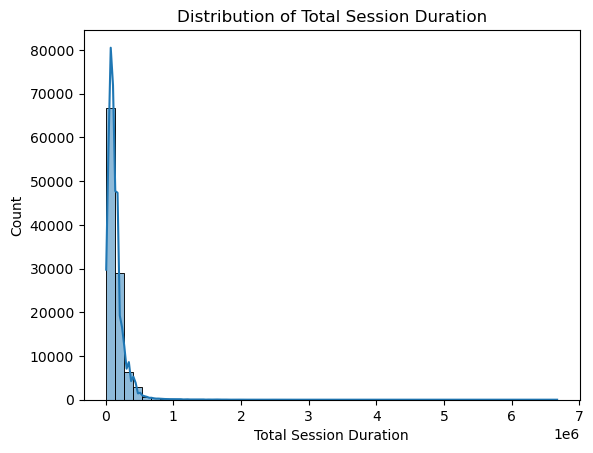

In [37]:
# Univariant graph 
sns.histplot(aggregated_data['total_session_duration_sec'], bins=50, kde=True)
plt.title('Distribution of Total Session Duration')
plt.xlabel('Total Session Duration')
plt.show()

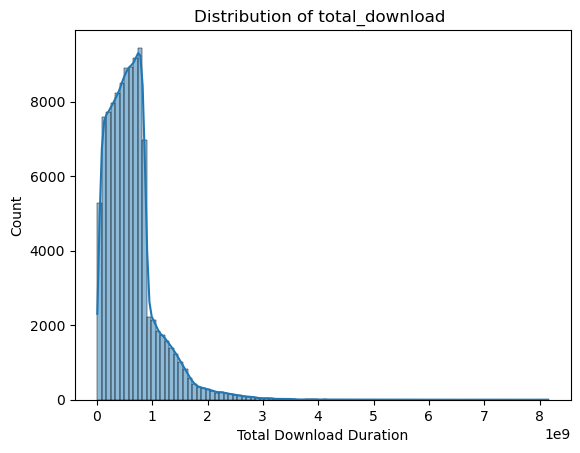

In [38]:
sns.histplot(aggregated_data['total_download'], bins=100, kde=True)
plt.title('Distribution of total_download ')
plt.xlabel('Total Download Duration')
plt.show()

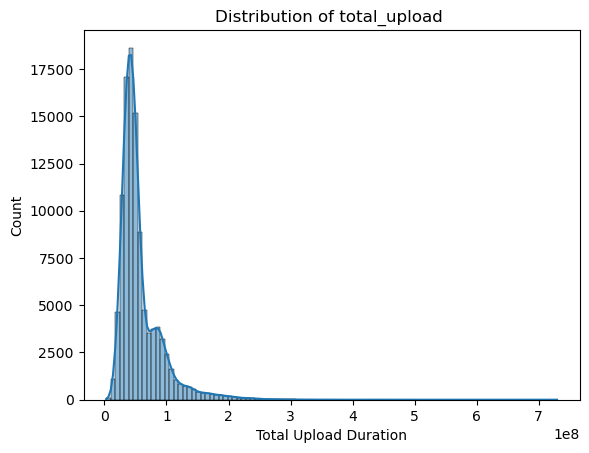

In [39]:
sns.histplot(aggregated_data['total_upload'], bins=100, kde=True)
plt.title('Distribution of total_upload ')
plt.xlabel('Total Upload Duration')
plt.show()

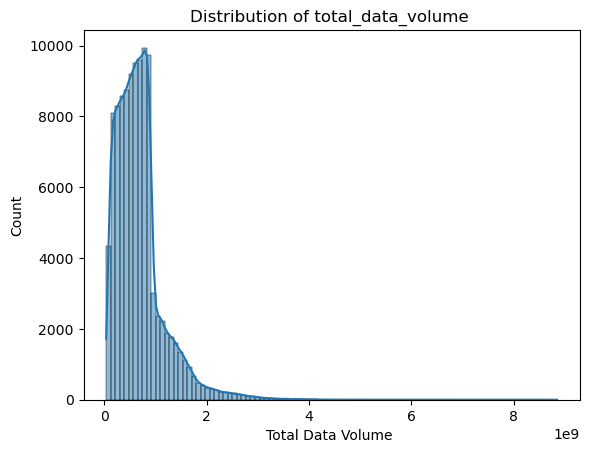

In [40]:
sns.histplot(aggregated_data['total_data_volume'], bins=100, kde=True)
plt.title('Distribution of total_data_volume ')
plt.xlabel('Total Data Volume ')
plt.show()

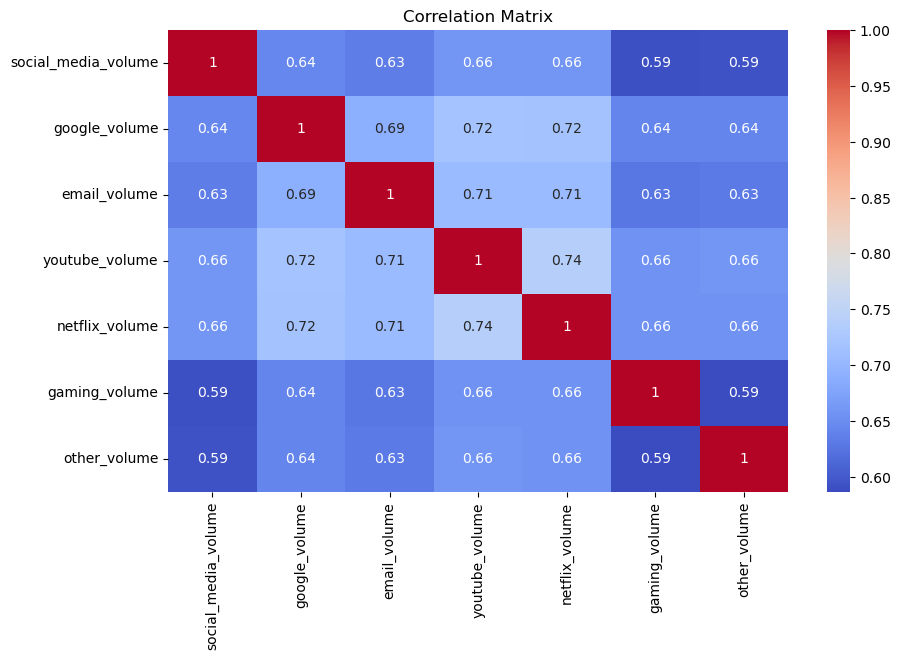

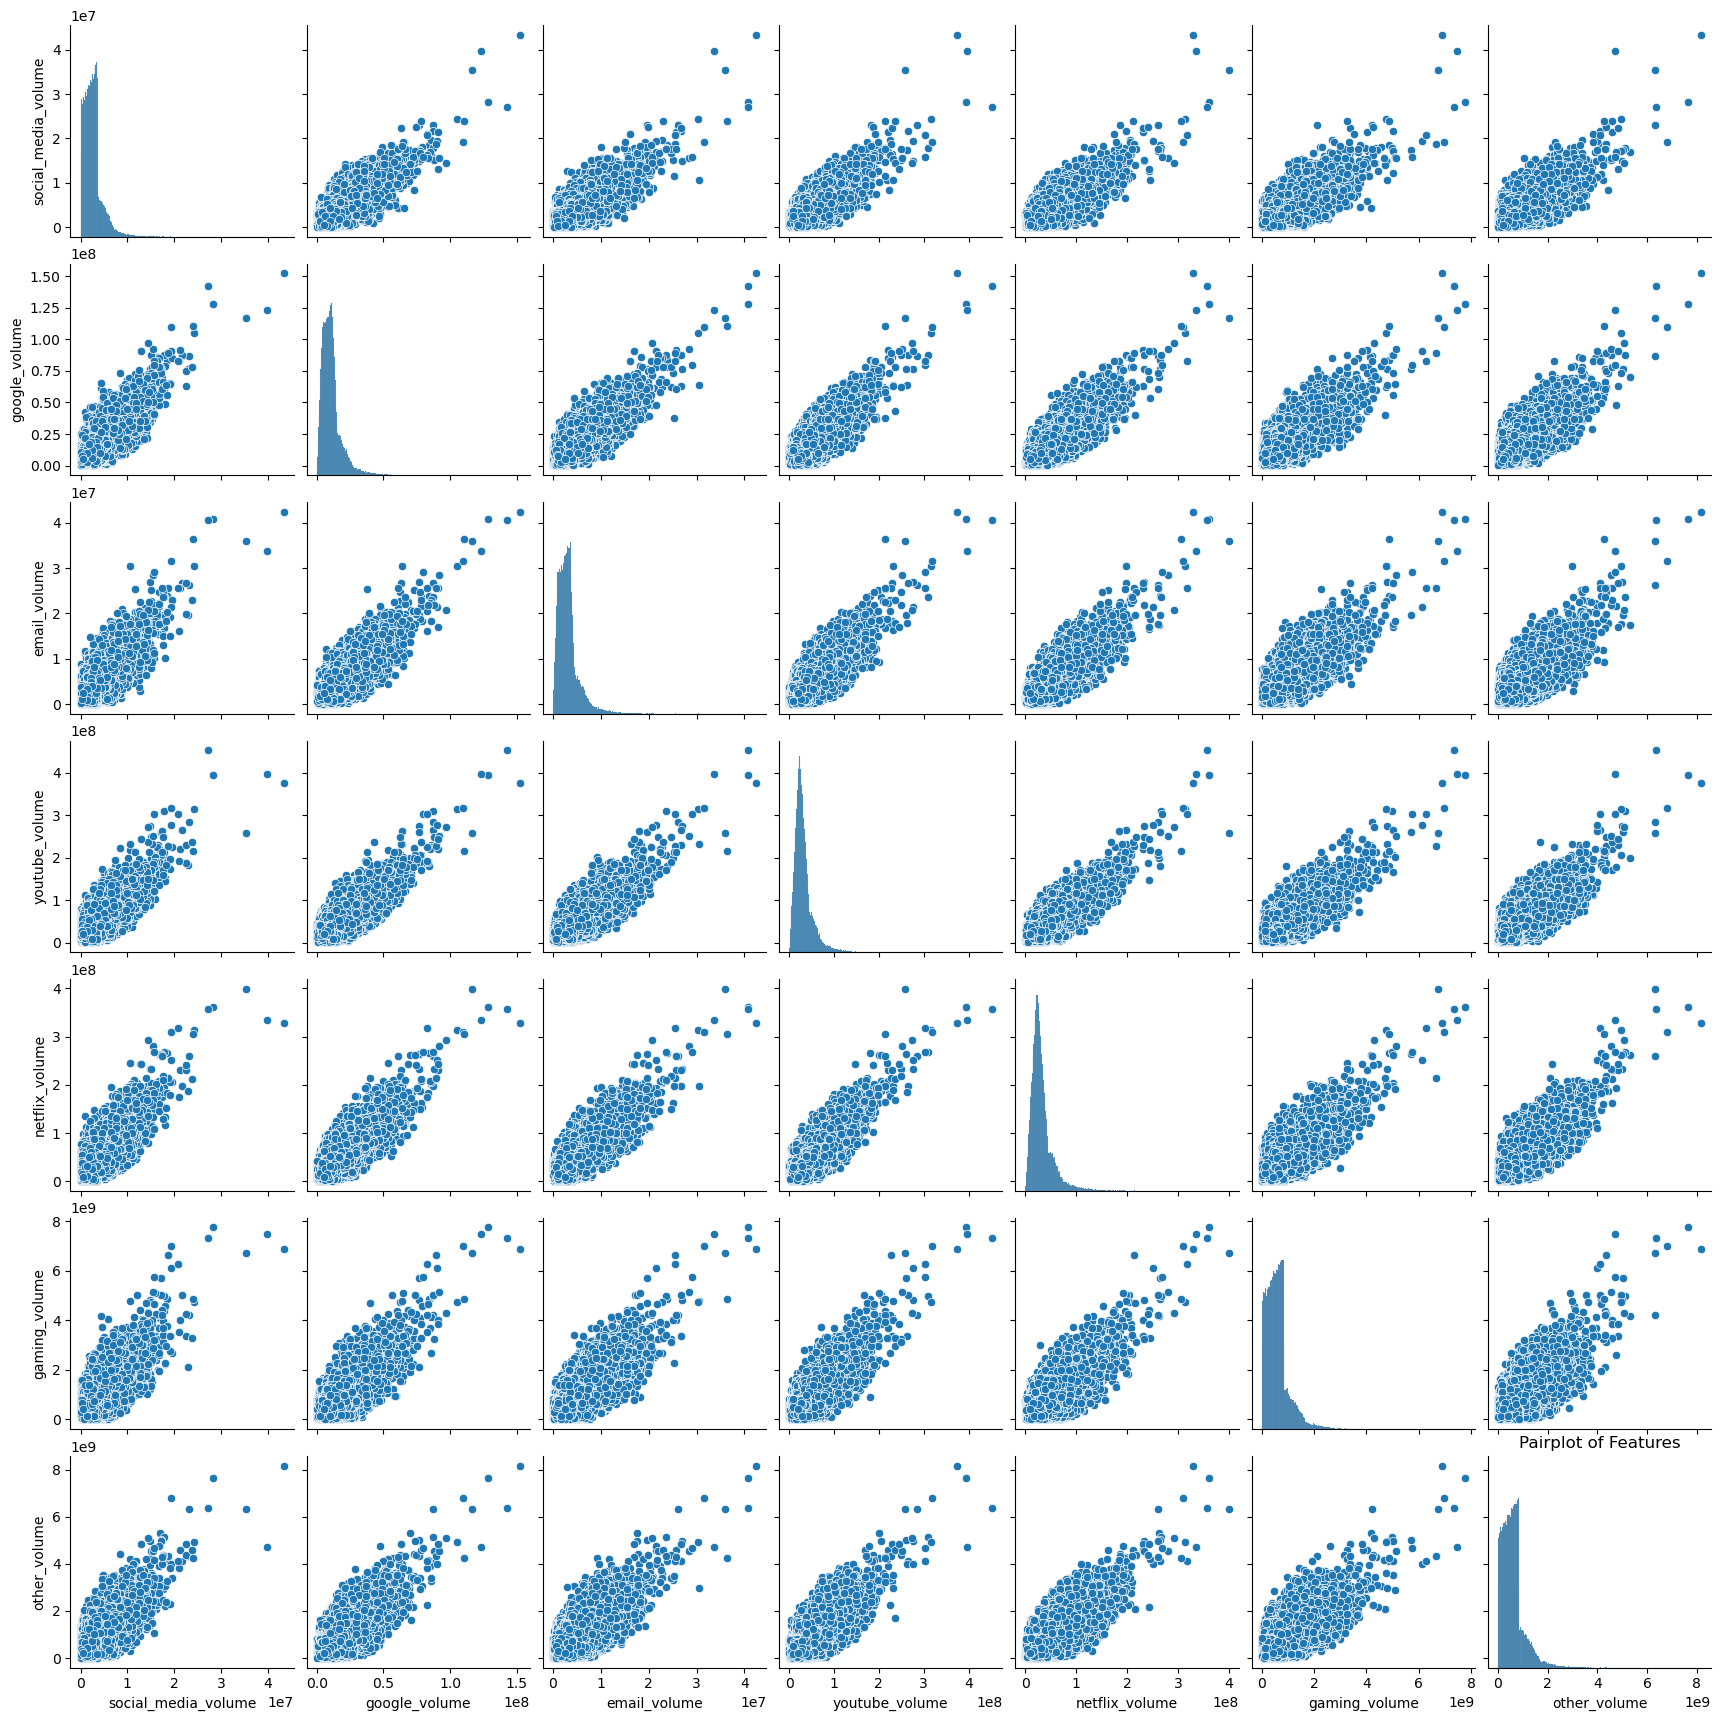

In [47]:
import plotly.express as px
data = aggregated_data[['social_media_volume', 'google_volume', 'email_volume',
                        'youtube_volume', 'netflix_volume', 'gaming_volume', 
                        'other_volume']]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Alternative 1: Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Alternative 2: Pairplot
sns.pairplot(data)
plt.title('Pairplot of Features')
plt.show()

